# face recognition of tollywood actors using face recognition API

<h3> importing packages we need </h3>


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cv2
import face_recognition
import os
import glob

<h3>Taking labels/names of the images</h3>
<ul><li>chiranjeevi</li>
    <li> maheshbabu</li>
    <li> nani</li>
    <li>ntr</li>
    <li> prabas</li>
    <li>rampothineni</li>
<li> rana</li>
 <li>venkatesh</li></ul>

In [18]:
f1 = os.listdir('fr/knownpics')
names = [i.split(".")[0] for i in f1]
images = []

In [19]:
names 

['chiranjeevi',
 'maheshbabu',
 'nani',
 'ntr',
 'prabas',
 'rampothineni',
 'rana',
 'venkatesh']

<h3> known pics encoded with cnn model, the default model is hog, hog is cpu friendly but cnn requires high computational power</h3> 

In [3]:
img_dir = "fr/knownpics"   
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
data = [] 
encodings12 = []
for f1 in files: 
    imag1 = face_recognition.load_image_file(f1)
    i = cv2.cvtColor(imag1, cv2.COLOR_BGR2RGB)
    locations1 = face_recognition.face_locations(imag1,model='cnn')
    k = face_recognition.face_encodings(imag1,locations1)[0]
    print(k.shape)#we can sheck the shape of the encoder and later tally with unknown images encode shape just to see we did correct
    encodings12.append(k)

(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)


In [5]:
print(encodings12)
MODEL = 'cnn' 
FRAME_THICKNESS = 3
FONT_THICKNESS = 2
unknownencode = []

[array([-0.10378567,  0.01670782,  0.02622858, -0.08287577,  0.01722909,
       -0.07133472,  0.10798602, -0.17684153,  0.22839256, -0.03893642,
        0.18523178, -0.013896  , -0.2609109 , -0.0963251 , -0.05454899,
        0.04544825, -0.10349478, -0.16667926, -0.01203412, -0.11422387,
        0.02040992,  0.01397018,  0.0689055 ,  0.02140379, -0.12210885,
       -0.29709089, -0.16282156, -0.14490286,  0.10023037, -0.11843497,
       -0.00632115,  0.04670872, -0.21235551, -0.03884772, -0.06515077,
        0.0207947 , -0.00714266, -0.10108444,  0.19921789,  0.10803854,
       -0.14945161, -0.02447199, -0.01650948,  0.23527791,  0.11541404,
       -0.03284433,  0.01982672, -0.04422056,  0.06170977, -0.15592535,
        0.09181315,  0.09613291,  0.12632787, -0.03342115,  0.1211967 ,
       -0.19140783, -0.02578705, -0.0074038 , -0.18369392,  0.09005875,
        0.02906878,  0.01735879, -0.0174583 ,  0.02356839,  0.09397529,
        0.11814471, -0.02176588, -0.12102504,  0.20559058, -0.1

<h3> Now lets take the unknown images and see how many faces are there in the pic using face_locations </h3>

[-0.08904698  0.03038421  0.00359161 -0.08381318 -0.11829216 -0.06199551
  0.0214206  -0.03252228  0.15569818 -0.06679536  0.14852986 -0.03459134
 -0.28163716  0.02743046 -0.09814283  0.03821672 -0.16047509 -0.11029868
 -0.02481675 -0.13951297  0.03474656  0.03825452  0.02461166  0.05869434
 -0.11716145 -0.3314065  -0.09585272 -0.11846945  0.04427209 -0.13257173
  0.01023258  0.06880806 -0.09085914 -0.01242002 -0.00621622  0.11266064
 -0.05822769 -0.1074612   0.25173169  0.05794952 -0.0708476  -0.03853827
  0.04740703  0.33034647  0.14746378  0.03911038 -0.02557275  0.05809381
  0.16881861 -0.30118939  0.05252022  0.15316038  0.15484233  0.02881711
  0.13259633 -0.13730088  0.07193951  0.08983885 -0.22773524  0.08909432
  0.01142718 -0.08167741  0.00807977 -0.01963297  0.19087937  0.11250778
 -0.06739142 -0.05045391  0.10486182 -0.26369172 -0.03934132  0.01006583
 -0.06886578 -0.16612978 -0.12768824  0.06090946  0.32809383  0.22538771
 -0.10211881  0.06602436  0.00336491 -0.06849875  0

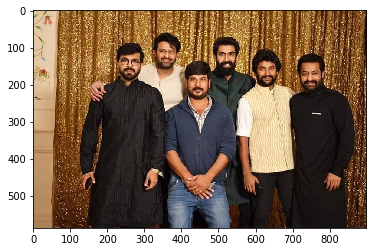

In [6]:
import matplotlib.pyplot as plt
encodings1=[]
image1 = face_recognition.load_image_file('fr/unknownpics/group.jpg')
i1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
locations = face_recognition.face_locations(image1,model=MODEL)
k1 = face_recognition.face_encodings(image1,locations)[0]
print(k1)
encodings1.append(k1)
plt.imshow(image1)

In [7]:
print('{} faces found in the pic'.format(len(locations)))

6 faces found in the pic


In [8]:
encodings12 = np.asarray(encodings12)#lets convert from list to array

In [9]:
encodings12[0].shape

(128,)

In [10]:
encodings1 = np.asarray(encodings1)

In [11]:
encodings1[0].shape

(128,)

<h3> We had  taken threshold as 0.63 as its a group pic and we can see the result as only two are correct </h3>

In [28]:
threshold=0.7
r = face_recognition.compare_faces(encodings12,encodings1[0],threshold)
r

[True, False, False, False, True, True, True, True]

In [29]:
results = r

In [30]:
if results[0]== True:
    print("found in pic {}".format(names[0]))
if results[1]== True:
    print("found in pic {}".format(names[1]))
if results[2]== True:
    print("found in pic {}".format(names[2]))
if results[3]== True:
    print("found in pic {}".format(names[3]))
if results[4]== True:
    print("found in pic {}".format(names[4]))
if results[5]== True:
    print("found in pic {}".format(names[5]))
if results[6]== True:
    print("found in pic {}".format(names[6]))
if results[7]== True:
    print("found in pic {}".format(names[7]))



found in pic chiranjeevi
found in pic prabas
found in pic rampothineni
found in pic rana
found in pic venkatesh


<h3> Now lets take an induvidual unknown pic </h3>

[-0.13051024  0.0555135   0.06361791 -0.03463051 -0.04763556 -0.02578144
 -0.00046556 -0.0072879   0.17951664 -0.00484602  0.15453935 -0.01673452
 -0.23559186 -0.08319281 -0.01982364  0.07441099 -0.11626142 -0.11066105
 -0.1076469  -0.07023993  0.01403108  0.04996993  0.05486378  0.01234436
 -0.12670767 -0.36751774 -0.05519744 -0.14378583  0.11316288 -0.14519592
 -0.09117872 -0.05271613 -0.28136012 -0.13355128 -0.01040699  0.13103226
  0.05496208 -0.07054611  0.13981238 -0.01211433 -0.14956951 -0.02853873
  0.02471465  0.18537073  0.12025025  0.09323251 -0.01247982 -0.02906518
  0.05057427 -0.24985495  0.15292446  0.09758716  0.08203146  0.02318497
  0.06137037 -0.20601036  0.02007431  0.07162771 -0.2567918   0.06405623
  0.04791761  0.05342925 -0.05629544  0.02774954  0.19768585  0.12199069
 -0.09819351 -0.12417007  0.11301415 -0.22112349  0.07809941  0.02623416
 -0.0147591  -0.14616124 -0.28989017  0.09034348  0.36695606  0.15461311
 -0.19610915  0.04182804 -0.14138794 -0.03910599  0

Text(0.5, 1.0, '1 faces found in the pic')

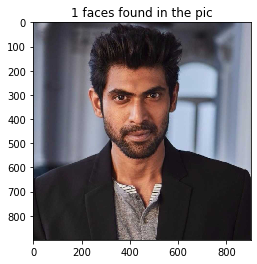

In [32]:
encodings11=[]
image11 = face_recognition.load_image_file('fr/unknownpics/rana.jpg')
locations2 = face_recognition.face_locations(image11,model=MODEL)
k11 = face_recognition.face_encodings(image11,locations2)[0] #numpy broadcasting is done, so no need of loops
print(k11)
encodings11.append(k11)
plt.imshow(image11)
plt.title('{} faces found in the pic'.format(len(locations2)))

<h5> we started threshold value at 0.6 and changed it to 0.5 for better results and we achievied perfect result </h5>

In [34]:
threshold1 = 0.5 #we can consider threshold as a hyperperameter when we compare 1 pic with many its better to low our threshold value and then check the result

r = face_recognition.compare_faces(encodings12,encodings11[0],threshold1) #numpy broadcasting
r

[False, False, False, False, False, False, True, False]

In [35]:
if r[0]== True:
    print("found in pic {}".format(names[0]))
if r[1]== True:
    print("found in pic {}".format(names[1]))
if r[2]== True:
    print("found in pic {}".format(names[2]))
if r[3]== True:
    print("found in pic {}".format(names[3]))
if r[4]== True:
    print("found in pic {}".format(names[4]))
if r[5]== True:
    print("found in pic {}".format(names[5]))
if r[6]== True:
    print("found in pic {}".format(names[6]))
if r[7]== True:
    print("found in pic {}".format(names[7]))




found in pic rana


<h3> now lets finaly test with uknown pics with 2 faces </h3>

[-1.38295278e-01  7.23747760e-02  8.68561864e-02  7.74327666e-03
 -4.41294983e-02 -6.96939081e-02 -8.72945786e-03 -4.02093977e-02
  1.75867364e-01  1.51072089e-02  1.28248960e-01 -9.37892497e-03
 -2.45191336e-01 -1.02482364e-01  7.79237598e-04  8.04897994e-02
 -1.18437558e-01 -1.32551417e-01 -3.92117873e-02 -5.31315729e-02
  8.91290233e-03  3.30292322e-02  5.78893013e-02 -2.19500065e-03
 -9.85793322e-02 -3.75971437e-01 -6.87766597e-02 -1.64667025e-01
  5.82065806e-02 -1.44459277e-01 -5.06561846e-02 -4.36574072e-02
 -2.22811967e-01 -1.50703028e-01  1.97870173e-02  1.37981296e-01
  4.31441255e-02 -1.85980201e-02  1.63831443e-01 -9.01427120e-05
 -1.87328577e-01 -4.36587706e-02  2.42758393e-02  2.58158445e-01
  1.26683831e-01  1.14941686e-01 -5.33903483e-03 -3.81682962e-02
  6.78114742e-02 -2.26168752e-01  1.53122023e-01  1.07827529e-01
  7.05156699e-02  1.45445280e-02  5.99573255e-02 -1.59133926e-01
  3.31692956e-02  4.04930972e-02 -2.90778965e-01  3.61416303e-02
  1.07393816e-01  1.66691

Text(0.5, 1.0, '2 faces found in the pic')

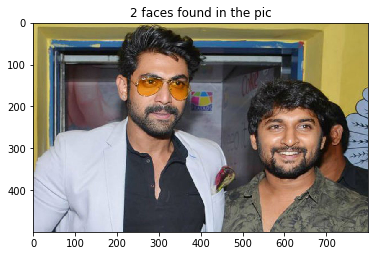

In [36]:
encodings13=[]
image12 = face_recognition.load_image_file('fr/unknownpics/kk.jpg')
locations3 = face_recognition.face_locations(image12,model=MODEL)
k12 = face_recognition.face_encodings(image12,locations3)[0]
print(k12)
encodings13.append(k12)
plt.imshow(image12)
plt.title('{} faces found in the pic'.format(len(locations3)))

<h5> for this threshold value of 0.546 is best for accurate value </h5>

In [38]:
encodings13 = np.asarray(encodings13)
threshold1 = 0.546

r = face_recognition.compare_faces(encodings12,encodings13[0],threshold1)
r

[False, False, True, False, False, False, True, False]

In [39]:
if r[0]== True:
    print("found in pic {}".format(names[0]))
if r[1]== True:
    print("found in pic {}".format(names[1]))
if r[2]== True:
    print("found in pic {}".format(names[2]))
if r[3]== True:
    print("found in pic {}".format(names[3]))
if r[4]== True:
    print("found in pic {}".format(names[4]))
if r[5]== True:
    print("found in pic {}".format(names[5]))
if r[6]== True:
    print("found in pic {}".format(names[6]))
if r[7]== True:
    print("found in pic {}".format(names[7]))



found in pic nani
found in pic rana


In [ ]:
print(locations3)
top_left = (locations3[0][3], locations3[0][0])
bottom_right = (locations3[0][1], locations3[0][2])
cv2.rectangle(image12, top_left, bottom_right, FRAME_THICKNESS)
cv2.imshow("group", image12)
